**Tarea Final - Batalla de barrios(vecindarios) de Montevideo - Parte 2**


**1. Análisis de datos con Foursquare**

4.1 Filtrado de datos por Municipios seleccionados

4.2 Aplicacion de API de Foursquare

4.3 Preparacion de datos para clustering

**2. Análisis de clustering por K-Means**

5.1 Preparación y armado de clusters

5.2 Preparación y armado del dataframe

5.3 Visualización en el mapa de los clusters

5.4 Análisis de cada cluster

**3. Resultados y conclusiones finales**

6.1 Resumen de resultados obtenidos

6.2 Conclusiones finales y recomendación

**4. Análisis de datos con Foursquare**

4.1 Filtrado de datos por Municipios seleccionados

Como indicamos en la 1era. parte, seleccionaremos para trabajar con Foursquare los datos de los municipios B, CH y E.

In [13]:
import pandas as pd
import numpy as np
import json # librería para manejar archivos JSON 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud
import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas
# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors
# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare
import folium # librería para graficar mapas 
from folium.features import DivIcon

/bin/bash: conda: command not found


In [12]:
# Importamos los datos de los dataframes guardados en la primera parte.
df_montevideo_coord2 = pd.read_csv(r'/content/df_montevideo_coord2.csv')
df_montevideo_coord2

,Barrio,Poblacion,Municipio,Latitud,Longitude
0,Pocitos,67992,CH,-34.911123,-56.150593
1,Cordón,42456,B,-34.900827,-56.180125
2,Unión,39880,"D, E y F",-34.880236,-56.137688
3,"La Paloma, Tomkinson",37424,A,-34.858785,-56.259420
4,Buceo,36998,CH y E,-34.897800,-56.128658
5,Casavalle,35979,D,-34.828916,-56.168784
6,"Peñarol, Lavalleja",34485,G,-34.841683,-56.186343
7,"Parque Batlle, Villa Dolores",31153,CH,-34.896868,-56.153383
8,Nuevo París,29873,A y G,-34.839535,-56.243839
9,Cerro,28306,NaN,-34.889817,-56.252625


In [16]:
# Importamos los datos de los dataframes guardados en la primera parte
df_montevideo_all_municipio = pd.read_csv(r'/content/df_montevideo_all_municipio.csv')
df_montevideo_socioeconom_municipio = pd.read_csv(r'/content/df_montevideo_socioeconom_municipio.csv')
print(df_montevideo_all_municipio.head())
print(df_montevideo_socioeconom_municipio.head())

  Municipio                                             Barrio  Poblacion
0         F  Villa García, Manga RuralMangaMaroñas, Parque ...     133776
1         G  Peñarol, LavallejaColón Centro y NoroesteConci...     123867
2         B  CordónCentroPalermoParque RodóBarrio SurCiudad...     115706
3        CH                PocitosParque Batlle, Villa Dolores      99145
4         E  MalvínMalvín NorteCarrascoPunta GordaCarrasco ...      91104
  Municipio  Nivel-SocioEconómico  IngresoxHogar
0         E              4.819555   24178.803953
1        CH              4.729483   14636.900456
2    B y CH              4.543561   12299.547249
3    CH y E              3.926684    7442.671847
4     A y C              3.883621    6193.896552


In [17]:
# De acuerdo a lo requerido, se selecciona los barios de los municipios B, CH y E
# Se unen los dataframes y se eliminan duplicados, reseteando el indice.
# Se descartan municipios que no fueron asignados, asignando a uno fuera de la selección ("A")
df_montevideo_coord2['Municipio'] = df_montevideo_coord2['Municipio'].fillna('A')
df_montevideo_b = df_montevideo_coord2[df_montevideo_coord2['Municipio'].str.contains('B')]
df_montevideo_ch = df_montevideo_coord2[df_montevideo_coord2['Municipio'].str.contains('CH')]
df_montevideo_e = df_montevideo_coord2[df_montevideo_coord2['Municipio'].str.contains('E')]
df_montevideo_bche = pd.concat([df_montevideo_b,df_montevideo_ch,df_montevideo_e])
df_montevideo_bche.drop_duplicates(['Barrio'], inplace = True)
df_montevideo_bche.reset_index(drop = True)

,Barrio,Poblacion,Municipio,Latitud,Longitude
0,Cordón,42456,B,-34.900827,-56.180125
1,Punta Carretas,24181,B y CH,-34.920202,-56.160065
2,Centro,22120,B,-34.906067,-56.189656
3,Aguada,18557,B y C,-34.896676,-56.189366
4,Tres Cruces,15926,B y CH,-34.892518,-56.167113
5,Palermo,12992,B,-34.911288,-56.180698
6,Parque Rodó,12944,B,-34.910082,-56.169778
7,Barrio Sur,12639,B,-34.911202,-56.194784
8,Ciudad Vieja,12555,B,-34.906351,-56.205979
9,La Comercial,11444,B y C,-34.886749,-56.169093


In [19]:
# Importamos los datos de los dataframes guardados en la primera parte
df_montevideo_all_municipio = pd.read_csv(r'/content/df_montevideo_all_municipio.csv')
df_montevideo_socioeconom_municipio = pd.read_csv(r'/content/df_montevideo_socioeconom_municipio.csv')
print(df_montevideo_all_municipio.head())
print(df_montevideo_socioeconom_municipio.head())

  Municipio                                             Barrio  Poblacion
0         F  Villa García, Manga RuralMangaMaroñas, Parque ...     133776
1         G  Peñarol, LavallejaColón Centro y NoroesteConci...     123867
2         B  CordónCentroPalermoParque RodóBarrio SurCiudad...     115706
3        CH                PocitosParque Batlle, Villa Dolores      99145
4         E  MalvínMalvín NorteCarrascoPunta GordaCarrasco ...      91104
  Municipio  Nivel-SocioEconómico  IngresoxHogar
0         E              4.819555   24178.803953
1        CH              4.729483   14636.900456
2    B y CH              4.543561   12299.547249
3    CH y E              3.926684    7442.671847
4     A y C              3.883621    6193.896552


In [20]:
# De acuerdo a lo requerido, se selecciona los barios de los municipios B, CH y E
# Se unen los dataframes y se eliminan duplicados, reseteando el indice.
# Se descartan municipios que no fueron asignados, asignando a uno fuera de la selección ("A")
df_montevideo_coord2['Municipio'] = df_montevideo_coord2['Municipio'].fillna('A')
df_montevideo_b = df_montevideo_coord2[df_montevideo_coord2['Municipio'].str.contains('B')]
df_montevideo_ch = df_montevideo_coord2[df_montevideo_coord2['Municipio'].str.contains('CH')]
df_montevideo_e = df_montevideo_coord2[df_montevideo_coord2['Municipio'].str.contains('E')]
df_montevideo_bche = pd.concat([df_montevideo_b,df_montevideo_ch,df_montevideo_e])
df_montevideo_bche.drop_duplicates(['Barrio'], inplace = True)
df_montevideo_bche.reset_index(drop = True)

,Barrio,Poblacion,Municipio,Latitud,Longitude
0,Cordón,42456,B,-34.900827,-56.180125
1,Punta Carretas,24181,B y CH,-34.920202,-56.160065
2,Centro,22120,B,-34.906067,-56.189656
3,Aguada,18557,B y C,-34.896676,-56.189366
4,Tres Cruces,15926,B y CH,-34.892518,-56.167113
5,Palermo,12992,B,-34.911288,-56.180698
6,Parque Rodó,12944,B,-34.910082,-56.169778
7,Barrio Sur,12639,B,-34.911202,-56.194784
8,Ciudad Vieja,12555,B,-34.906351,-56.205979
9,La Comercial,11444,B y C,-34.886749,-56.169093


**4.2 Aplicación de API de Foursquare**

In [21]:
# The code was removed by Watson Studio for sharing.

In [22]:
# Ubicamos los datos de uno de los barrios de los municipios seleccionados.
print('El barrio elegido para probar Foursquare es:' , df_montevideo_bche.loc[0, 'Barrio'])
barrio_latitud = df_montevideo_bche.loc[0, 'Latitud'] # latitud del barrio 
barrio_longitud = df_montevideo_bche.loc[0, 'Longitude'] # longitud del barrio
barrio_name = df_montevideo_bche.loc[0, 'Barrio'] # nombre del barrio
print('Latitud y longitude de {} son {}, {}.'.format(barrio_name,barrio_latitud,barrio_longitud))

El barrio elegido para probar Foursquare es: Pocitos
Latitud y longitude de Pocitos son -34.9111227, -56.1505928.


In [25]:
CLIENT_ID = 'LVNSPMLTBBDPN2INEYVDDVFWLONMFATTHN1UXOKODIXDTMZA'
CLIENT_SECRET = 'UU3FWAT2QOHGJHGYAGR54F5GFB4NJZFNDITCJZUTFCNW2OYI'
VERSION = 20200514 # Foursquare API version

print('Credentials Stored')

Credentials Stored


In [26]:
# Para la API de Foursquare, cargamos los datos.Obtengamos los 100 sitios en Marble Hill dentro de un radio de 500 metros.
# Primero, generemos una URL de solicitud GET. Nombre su URL url.
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    barrio_latitud, 
    barrio_longitud, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=LVNSPMLTBBDPN2INEYVDDVFWLONMFATTHN1UXOKODIXDTMZA&client_secret=UU3FWAT2QOHGJHGYAGR54F5GFB4NJZFNDITCJZUTFCNW2OYI&v=20200514&ll=-34.9111227,-56.1505928&radius=500&limit=100'

In [27]:
# Enviar la solicitud GET y examinar los resultados.
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '62ae14946123a7205a6f22ec'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4f3f42ace4b0d66d1ef42641-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/bedandbreakfast_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1f8931735',
         'name': 'Bed & Breakfast',
         'pluralName': 'Bed & Breakfasts',
         'primary': True,
         'shortName': 'B & B'}],
       'id': '4f3f42ace4b0d66d1ef42641',
       'location': {'address': '26 Marzo 1125',
        'cc': 'UY',
        'city': 'Montevideo',
        'country': 'Uruguay',
        'distance': 81,
        'formattedAddress': ['26 Marzo 1125',
         'Montevideo Montevideo',
         'Uruguay'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 

In [28]:
# Del laboratorio anterior de FourSquare sabemos que toda la información esta en la llave items.
# Antes de avanzar, usemos la función get_category_type del laboratorio anterios.
# función para extraer la categoria del sitio
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Ahora estamos listos para limpiar el objeto json y estructurarlo en un dataframe pandas
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # objeto JSON

# filtrar columnas
filtered_columns = ['venue.name', 'venue.location.address' , 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filtrar la categoría para cada fila
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# limpiar columnas
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

# ¿Cuantos sitios nos regresó FourSquare?
print('{} venues fueron devueltos por Foursquare.'.format(nearby_venues.shape[0]))

62 venues fueron devueltos por Foursquare.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [29]:
nearby_venues.head()

,name,address,categories,lat,lng
0,Destino 26,26 Marzo 1125,Bed & Breakfast,-34.910430,-56.150301
1,Petite Patisserie De Flor,José Martí 3340,Dessert Shop,-34.912180,-56.149359
2,Cake's,José Ellauri 1067,Dessert Shop,-34.911405,-56.152888
3,La Latina Café,Avenida Brasil 2858,Café,-34.910305,-56.152765
4,Miyagi Shushi,Gabriel Pereira 3138,Japanese Restaurant,-34.908886,-56.148351


In [30]:
# filtramos por los que son competencia, o sea categoria "Gym / Fitness Center "
nearby_gym_fitness = nearby_venues[nearby_venues['categories'] == 'Gym / Fitness Center']
print('{} gyms-fitness center  en {} fueron devueltos por Foursquare.'.format(nearby_gym_fitness.shape[0],results['response']['headerFullLocation']))
nearby_gym_fitness

2 gyms-fitness center  en Pocitos, Montevideo fueron devueltos por Foursquare.


,name,address,categories,lat,lng
6,Aerobic,Av. 26 de Marzo 1069,Gym / Fitness Center,-34.911045,-56.151235
16,Aerobic,Gabriel Pereira 3119,Gym / Fitness Center,-34.908552,-56.148650


En principio no habria mucha competencia en uno de los barrios de mayor población y nivel socioecoómico.
Veamos que otras categorias tenemos en el dataframe

In [31]:
print(nearby_venues['categories'].unique())

['Bed & Breakfast' 'Dessert Shop' 'Café' 'Japanese Restaurant'
 'Italian Restaurant' 'Gym / Fitness Center' 'Falafel Restaurant'
 'Pizza Place' 'Restaurant' 'Burger Joint' 'Latin American Restaurant'
 'Beach' 'Scenic Lookout' 'Sandwich Place' 'Ice Cream Shop'
 'Shopping Mall' 'Coffee Shop' 'Hotel' 'Empanada Restaurant'
 'South American Restaurant' 'Basketball Stadium' 'Newsstand' 'BBQ Joint'
 'Bar' 'Multiplex' 'Bakery' 'Convenience Store' 'Steakhouse' 'Market'
 'Middle Eastern Restaurant' 'Beer Store' 'Supermarket' 'Pharmacy'
 'Hot Dog Joint' 'Mexican Restaurant' 'Paper / Office Supplies Store'
 'Cocktail Bar' 'Nightclub' 'Hostel' 'Diner' 'Chinese Restaurant'
 'Sporting Goods Shop' 'Liquor Store']


In [32]:
# Filtremos por Sporting Goods Shop y Basketball stadium
nearby_sports = nearby_venues[nearby_venues['categories'] == 'Sporting Goods Shop']
nearby_sports2 = nearby_venues[nearby_venues['categories'] == 'Basketball Stadium']
print('{} sports center  en {} fueron devueltos por Foursquare.'.format(nearby_sports.shape[0]+nearby_sports2.shape[0],results['response']['headerFullLocation']))
nearby_sports.append(nearby_sports2)

2 sports center  en Pocitos, Montevideo fueron devueltos por Foursquare.


,name,address,categories,lat,lng
59,Motociclo Sports,Miguel Barreiro 3243,Sporting Goods Shop,-34.909032,-56.146623
29,Club Trouville,Chucarro 1031,Basketball Stadium,-34.912473,-56.149755


**4.3 Preparación de datos para clustering**

Vamos a crear una función que repita el mismo proceso para todos los barrios de los municipios B,CH,E

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # crear la URL de solicitud de API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # solicitud GET
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # regresa solo información relevante de cada sitio cercano
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location']['formattedAddress'][0],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Barrio', 
                  'Barrio Latitud', 
                  'Barrio Longitud', 
                  'Local',
                  'Local Latitud', 
                  'Local Longitud',
                  'Local Dirección(esquina)',          
                  'Local Categoria']
    
    return(nearby_venues)


Ahora desarrollamos el código para determinar los sitios por barrio de los municipios B,CH y E, y creamos un dataframe **df_montevideo_bche_sitios**.

In [35]:
df_montevideo_bche_sitios = getNearbyVenues(names=df_montevideo_bche['Barrio'],
                                   latitudes=df_montevideo_bche['Latitud'],
                                   longitudes=df_montevideo_bche['Longitude']
                                  )
#results
print(df_montevideo_bche_sitios.shape)
df_montevideo_bche_sitios.head(20)

Cordón
Punta Carretas
Centro
Aguada
Tres Cruces
Palermo
Parque Rodó
Barrio Sur
Ciudad Vieja
La Comercial
Pocitos
Buceo
Parque Batlle, Villa Dolores
Larrañaga
La Blanqueada
Unión
Malvín
Las Canteras
Malvín Norte
Carrasco
Punta Gorda
Carrasco Norte
(575, 8)


,Barrio,Barrio Latitud,Barrio Longitud,Local,Local Latitud,Local Longitud,Local Dirección(esquina),Local Categoria
0,Cordón,-34.900827,-56.180125,La Trastienda Club,-34.898455,-56.178493,Fernández Crespo 1763 (Paysandú),Music Venue
1,Cordón,-34.900827,-56.180125,Feria de Tristán Narvaja,-34.899993,-56.178761,Tristán Narvaja (e/ Av. 18 de Julio y La Paz),Flea Market
2,Cordón,-34.900827,-56.180125,Confitería Carrera,-34.902545,-56.179903,Magallanes (Colonia),Dessert Shop
3,Cordón,-34.900827,-56.180125,Plaza de los 33,-34.903020,-56.180370,Av. 18 de Julio (e/ Minas y Magallanes),Plaza
4,Cordón,-34.900827,-56.180125,Asociación Cristiana de Jóvenes,-34.900806,-56.176413,Colonia 1870 (Eduardo Acevedo),Gym / Fitness Center
5,Cordón,-34.900827,-56.180125,Palacio Peñarol,-34.898751,-56.182473,Magallanes 1721 (Galicia),Basketball Court
6,Cordón,-34.900827,-56.180125,Verde,-34.899519,-56.179068,Montevideo Montevideo,Bar
7,Cordón,-34.900827,-56.180125,Don Koto,-34.901973,-56.178894,Colonia 1758 (Gaboto),BBQ Joint
8,Cordón,-34.900827,-56.180125,Donut City,-34.904526,-56.181488,Carlos Roxlo 1381,Donut Shop
9,Cordón,-34.900827,-56.180125,Mosca,-34.904858,-56.181968,Av. 18 de Julio 1578 (Carlos Roxlo),Paper / Office Supplies Store


In [36]:
# Exportamos el dataframe para guararlo en Datos
df_montevideo_bche_sitios.to_csv('df_montevideo_bche_sitios.csv', index = False)

In [37]:
#Contamos la cantidad de sitios por barrio
print('Locales por Barrio',df_montevideo_bche_sitios.groupby('Barrio')['Local'].count())
print('Se detectaron {} categorias únicas.'.format(len(df_montevideo_bche_sitios['Local Categoria'].unique())))

Locales por Barrio Barrio
Aguada                           7
Barrio Sur                      37
Buceo                            5
Carrasco                        40
Carrasco Norte                   4
Centro                          62
Ciudad Vieja                    67
Cordón                          33
La Blanqueada                    8
La Comercial                     9
Larrañaga                        6
Malvín                           9
Malvín Norte                     3
Palermo                         33
Parque Batlle, Villa Dolores    14
Parque Rodó                     58
Pocitos                         62
Punta Carretas                  85
Punta Gorda                      6
Tres Cruces                     22
Unión                            5
Name: Local, dtype: int64
Se detectaron 133 categorias únicas.


In [38]:
# Determinamos las categorias
df_montevideo_bche_sitios['Local Categoria'].unique()

array(['Music Venue', 'Flea Market', 'Dessert Shop', 'Plaza',
       'Gym / Fitness Center', 'Basketball Court', 'Bar', 'BBQ Joint',
       'Donut Shop', 'Paper / Office Supplies Store', 'Theater',
       'Pizza Place', 'Breakfast Spot', 'Gym',
       'South American Restaurant', 'Sandwich Place', 'Ice Cream Shop',
       'Supermarket', 'Clothing Store', 'Gay Bar', 'Convenience Store',
       'Coffee Shop', 'Soccer Field', 'Deli / Bodega',
       'Mediterranean Restaurant', 'Hotel', 'Café', 'Boutique',
       'Shoe Store', 'Tea Room', 'Restaurant', 'Shopping Mall',
       'Steakhouse', 'Wine Bar', 'Public Art', 'Golf Course',
       'Sushi Restaurant', 'Shop & Service', 'Mexican Restaurant',
       'Modern European Restaurant', "Women's Store", 'Night Market',
       'Burger Joint', 'Multiplex', 'Electronics Store', "Men's Store",
       'Bookstore', 'Italian Restaurant', 'Bakery',
       'Fast Food Restaurant', 'Taco Place', 'Latin American Restaurant',
       'Kebab Restaurant', 'Spa

In [39]:
# Filtramos el dataframe por las categorias que tengan que ver con deportes, gym, parques, outodoors, playas, etc. y lugares de comida.
df_montevideo_gym = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Gym')]
df_montevideo_sport = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Sport')]
df_montevideo_outdoors = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Outdoor')]
df_montevideo_parques = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Park')]
df_montevideo_plazas = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Plaza')]
df_montevideo_estadios = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Stadium')]
df_montevideo_playas = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Beach')]
df_montevideo_basket = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Basket')]
df_montevideo_futbol = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Soccer')]
df_montevideo_golf = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Golf')]
df_montevideo_tennis = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Tennis')]
df_montevideo_restaurant = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Restaurant')]
df_montevideo_food = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Food')]

df_montevideo_sport_foods_sitios = pd.concat([df_montevideo_gym,df_montevideo_sport,df_montevideo_outdoors,df_montevideo_parques,
                                             df_montevideo_plazas,df_montevideo_estadios,df_montevideo_playas,df_montevideo_basket,
                                             df_montevideo_futbol,df_montevideo_tennis,df_montevideo_golf,df_montevideo_food,
                                             df_montevideo_restaurant])
df_montevideo_sport_foods_sitios.drop_duplicates(['Local'], inplace = True)

# Exportamos y mostramos el nuevo dataframe solo con los sitios que nos interesan.
df_montevideo_sport_foods_sitios.to_csv('df_montevideo_sport_foods_sitios.csv', index = False)
df_montevideo_sport_foods_sitios.reset_index(drop=True)

,Barrio,Barrio Latitud,Barrio Longitud,Local,Local Latitud,Local Longitud,Local Dirección(esquina),Local Categoria
0,Cordón,-34.900827,-56.180125,Asociación Cristiana de Jóvenes,-34.900806,-56.176413,Colonia 1870 (Eduardo Acevedo),Gym / Fitness Center
1,Cordón,-34.900827,-56.180125,Club BPS,-34.901414,-56.180063,Mercedes 1723 (Magallanes),Gym
2,Punta Carretas,-34.920202,-56.160065,Instinto Crossfit,-34.917322,-56.157522,21 De Setiembre 2745 (Luis De La Torre),Gym / Fitness Center
3,Punta Carretas,-34.920202,-56.160065,Beauty Planet,-34.921482,-56.156163,Blanca Del Tabaré 2990 (Ellauri),Gym
4,Punta Carretas,-34.920202,-56.160065,Via Aqua Spa,-34.924113,-56.157570,Victor Soliño 375,Gym
...,...,...,...,...,...,...,...,...
157,Carrasco,-34.885577,-56.058150,Dackel,-34.889256,-56.057562,Gabriel Otero 6438 (Arocena),German Restaurant
158,Carrasco,-34.885577,-56.058150,Hoy Te Quiero,-34.889672,-56.056654,Arocena (Otero),Restaurant
159,Carrasco,-34.885577,-56.058150,Tajamar Restó,-34.883163,-56.061224,Lieja 6416 (Divina Comedia),American Restaurant
160,Punta Gorda,-34.899841,-56.081571,Hemingway,-34.898744,-56.082226,Rambla República de México 5535,Seafood Restaurant


In [40]:
df_montevideo_sport_foods_sitios.to_csv('df_montevideo_sport_foods_sitios.csv', index = False)

In [41]:
#Contamos la cantidad de sitios por barrio
print('Locales por Barrio',df_montevideo_sport_foods_sitios.groupby('Barrio')['Local'].count())
print('Se detectaron {} categorias únicas.'.format(len(df_montevideo_sport_foods_sitios['Local Categoria'].unique())))

Locales por Barrio Barrio
Aguada                           1
Barrio Sur                       3
Buceo                            1
Carrasco                        14
Carrasco Norte                   1
Centro                          13
Ciudad Vieja                    21
Cordón                           8
La Blanqueada                    3
La Comercial                     1
Larrañaga                        5
Malvín                           4
Malvín Norte                     2
Palermo                         14
Parque Batlle, Villa Dolores    11
Parque Rodó                     12
Pocitos                         15
Punta Carretas                  21
Punta Gorda                      5
Tres Cruces                      6
Unión                            1
Name: Local, dtype: int64
Se detectaron 45 categorias únicas.


**Ahora procedemos a preparar los datos para el clustering**

In [42]:
# codificación
montevideo_sport_foods_onehot = pd.get_dummies(df_montevideo_sport_foods_sitios[['Local Categoria']], prefix="", prefix_sep="")

# añadir la columna de barrio de regreso al dataframe
montevideo_sport_foods_onehot['Barrio'] = df_montevideo_sport_foods_sitios['Barrio'] 

# mover la columna de barrio a la primer columna
fixed_columns = [montevideo_sport_foods_onehot.columns[-1]] + list(montevideo_sport_foods_onehot.columns[:-1])
montevideo_sport_foods_onehot = montevideo_sport_foods_onehot[fixed_columns]

montevideo_sport_foods_onehot.reset_index(drop=True).head()

,Barrio,American Restaurant,Athletics & Sports,Basketball Court,Basketball Stadium,Beach,Chinese Restaurant,Comfort Food Restaurant,Empanada Restaurant,Falafel Restaurant,...,Southern / Soul Food Restaurant,Spanish Restaurant,Sporting Goods Shop,Stadium,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tennis Court,Track Stadium,Vegetarian / Vegan Restaurant
0,Cordón,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cordón,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Punta Carretas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Punta Carretas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Punta Carretas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
print(montevideo_sport_foods_onehot.shape)

(162, 46)


In [44]:
montevideo_sport_foods_onehot.to_csv('montevideo_sport_foods_onehot.csv', index = False)

**Agrupemos las filas por barrios tomando la média de la frecuancia de la ocurrencia de cada categoría**

In [45]:
montevideo_sport_foods_grouped = montevideo_sport_foods_onehot.groupby('Barrio').mean().reset_index()
montevideo_sport_foods_grouped

,Barrio,American Restaurant,Athletics & Sports,Basketball Court,Basketball Stadium,Beach,Chinese Restaurant,Comfort Food Restaurant,Empanada Restaurant,Falafel Restaurant,...,Southern / Soul Food Restaurant,Spanish Restaurant,Sporting Goods Shop,Stadium,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tennis Court,Track Stadium,Vegetarian / Vegan Restaurant
0,Aguada,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Barrio Sur,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Buceo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Carrasco,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000
4,Carrasco Norte,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Centro,0.000000,0.076923,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,...,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Ciudad Vieja,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,...,0.047619,0.000000,0.000000,0.000000,0.047619,0.047619,0.047619,0.000000,0.000000,0.047619
7,Cordón,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,La Blanqueada,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,La Comercial,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
montevideo_sport_foods_grouped.shape

(21, 46)

In [47]:
montevideo_sport_foods_grouped.to_csv('montevideo_sport_foods_grouped.csv', index = False)

**Imprimamos cada barrio junto con los 5 sitios mas comunes**

In [48]:
num_top_venues = 5

for barrio in montevideo_sport_foods_grouped['Barrio']:
    print("----"+barrio+"----")
    temp = montevideo_sport_foods_grouped[montevideo_sport_foods_grouped['Barrio'] == barrio].T.reset_index()
    temp.columns = ['sitio','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aguada----
                        sitio  freq
0           Food & Drink Shop   1.0
1   South American Restaurant   0.0
2  Modern European Restaurant   0.0
3        Other Great Outdoors   0.0
4                        Park   0.0


----Barrio Sur----
                 sitio  freq
0  American Restaurant  0.33
1           Restaurant  0.33
2    Food & Drink Shop  0.33
3         Tennis Court  0.00
4     Tapas Restaurant  0.00


----Buceo----
                        sitio  freq
0                        Park   1.0
1         American Restaurant   0.0
2          Mexican Restaurant   0.0
3  Modern European Restaurant   0.0
4        Other Great Outdoors   0.0


----Carrasco----
                     sitio  freq
0               Restaurant  0.29
1                    Plaza  0.21
2      American Restaurant  0.14
3  Comfort Food Restaurant  0.07
4                     Park  0.07


----Carrasco Norte----
                        sitio  freq
0                        Park   1.0
1         American Restauran

**Pongamos eso en el dataframe**

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Generemos el nuevo dataframe y mostremos los primeros 10 sitios de cada barrio.

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# crear las columnas acorde al numero de sitios populares
columns = ['Barrio']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# crear un nuevo dataframe
montevideo_sport_foods_sorted = pd.DataFrame(columns=columns)
montevideo_sport_foods_sorted['Barrio'] = montevideo_sport_foods_grouped['Barrio']

for ind in np.arange(montevideo_sport_foods_grouped.shape[0]):
    montevideo_sport_foods_sorted.iloc[ind, 1:] = return_most_common_venues(montevideo_sport_foods_grouped.iloc[ind, :], num_top_venues)

montevideo_sport_foods_sorted.head()

,Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aguada,Food & Drink Shop,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field
1,Barrio Sur,American Restaurant,Restaurant,Food & Drink Shop,Tennis Court,Tapas Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza
2,Buceo,Park,American Restaurant,Mexican Restaurant,Modern European Restaurant,Other Great Outdoors,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field
3,Carrasco,Restaurant,Plaza,American Restaurant,Comfort Food Restaurant,Park,German Restaurant,Food Court,Tennis Court,Sushi Restaurant,Soccer Field
4,Carrasco Norte,Park,American Restaurant,Mexican Restaurant,Modern European Restaurant,Other Great Outdoors,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field


In [51]:
montevideo_sport_foods_sorted.shape

(21, 11)

In [52]:
montevideo_sport_foods_sorted.to_csv('montevideo_sport_foods_sorted.csv', index = False)

**5. Análisis de clustering por K-Means**

5.1 Preparación y armado de los clusters

Ejecutemos k-means para agrupar los barrios en 5 agrupaciones.

In [53]:
# establecer el número de agrupaciones
kclusters = 5

montevideo_grouped_clustering = montevideo_sport_foods_grouped.drop('Barrio', 1)

# ejecutar k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(montevideo_grouped_clustering)

# revisar las etiquetas de las agrupaciones generadas para cada fila del dataframe
kmeans.labels_[0:10] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


array([3, 1, 2, 1, 2, 1, 1, 1, 1, 4], dtype=int32)

**5.2 Preparación y armado del Dataframe**

Generemos un nuevo dataframe que incluya la agrupación asi como los 10 sitios mas populares de cada barrio.

In [54]:
# añadir etiquetas
montevideo_sport_foods_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

montevideo_barrios_merged = df_montevideo_bche

# juntar el dataframe con cluster con el dataframe de los datos 
montevideo_barrios_merged = montevideo_barrios_merged.join(montevideo_sport_foods_sorted.set_index('Barrio'), on='Barrio')

montevideo_barrios_merged.head() # revisar las ultimas columnas

,Barrio,Poblacion,Municipio,Latitud,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Cordón,42456,B,-34.900827,-56.180125,1.0,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym,Soccer Field,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
12,Punta Carretas,24181,B y CH,-34.920202,-56.160065,1.0,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Mexican Restaurant,Golf Course,Modern European Restaurant,Sushi Restaurant
17,Centro,22120,B,-34.906067,-56.189656,1.0,Plaza,Restaurant,Gym / Fitness Center,Athletics & Sports,Chinese Restaurant,Latin American Restaurant,Kebab Restaurant,Italian Restaurant,Spanish Restaurant,Gym
25,Aguada,18557,B y C,-34.896676,-56.189366,3.0,Food & Drink Shop,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field
30,Tres Cruces,15926,B y CH,-34.892518,-56.167113,1.0,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field,South American Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Restaurant


In [55]:
montevideo_barrios_merged.reset_index(drop=True, inplace = True)
montevideo_barrios_merged

,Barrio,Poblacion,Municipio,Latitud,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cordón,42456,B,-34.900827,-56.180125,1.0,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym,Soccer Field,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
1,Punta Carretas,24181,B y CH,-34.920202,-56.160065,1.0,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Mexican Restaurant,Golf Course,Modern European Restaurant,Sushi Restaurant
2,Centro,22120,B,-34.906067,-56.189656,1.0,Plaza,Restaurant,Gym / Fitness Center,Athletics & Sports,Chinese Restaurant,Latin American Restaurant,Kebab Restaurant,Italian Restaurant,Spanish Restaurant,Gym
3,Aguada,18557,B y C,-34.896676,-56.189366,3.0,Food & Drink Shop,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field
4,Tres Cruces,15926,B y CH,-34.892518,-56.167113,1.0,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field,South American Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Restaurant
5,Palermo,12992,B,-34.911288,-56.180698,1.0,Restaurant,Other Great Outdoors,Gym,Basketball Court,Basketball Stadium,Stadium,Italian Restaurant,Gym / Fitness Center,South American Restaurant,Park
6,Parque Rodó,12944,B,-34.910082,-56.169778,1.0,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant,Food,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
7,Barrio Sur,12639,B,-34.911202,-56.194784,1.0,American Restaurant,Restaurant,Food & Drink Shop,Tennis Court,Tapas Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza
8,Ciudad Vieja,12555,B,-34.906351,-56.205979,1.0,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza,Latin American Restaurant,Italian Restaurant,Health Food Store,South American Restaurant,Southern / Soul Food Restaurant
9,La Comercial,11444,B y C,-34.886749,-56.169093,4.0,Middle Eastern Restaurant,Mexican Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field


In [56]:
# Eliminamos la fila de "Las Canteras " dado que no asignó sitios.
montevideo_barrios_merged.drop(17, axis=0, inplace = True)

In [57]:
montevideo_barrios_merged.reset_index(drop=True, inplace = True)

In [58]:
montevideo_barrios_merged

,Barrio,Poblacion,Municipio,Latitud,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cordón,42456,B,-34.900827,-56.180125,1.0,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym,Soccer Field,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
1,Punta Carretas,24181,B y CH,-34.920202,-56.160065,1.0,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Mexican Restaurant,Golf Course,Modern European Restaurant,Sushi Restaurant
2,Centro,22120,B,-34.906067,-56.189656,1.0,Plaza,Restaurant,Gym / Fitness Center,Athletics & Sports,Chinese Restaurant,Latin American Restaurant,Kebab Restaurant,Italian Restaurant,Spanish Restaurant,Gym
3,Aguada,18557,B y C,-34.896676,-56.189366,3.0,Food & Drink Shop,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field
4,Tres Cruces,15926,B y CH,-34.892518,-56.167113,1.0,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field,South American Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Restaurant
5,Palermo,12992,B,-34.911288,-56.180698,1.0,Restaurant,Other Great Outdoors,Gym,Basketball Court,Basketball Stadium,Stadium,Italian Restaurant,Gym / Fitness Center,South American Restaurant,Park
6,Parque Rodó,12944,B,-34.910082,-56.169778,1.0,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant,Food,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
7,Barrio Sur,12639,B,-34.911202,-56.194784,1.0,American Restaurant,Restaurant,Food & Drink Shop,Tennis Court,Tapas Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza
8,Ciudad Vieja,12555,B,-34.906351,-56.205979,1.0,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza,Latin American Restaurant,Italian Restaurant,Health Food Store,South American Restaurant,Southern / Soul Food Restaurant
9,La Comercial,11444,B y C,-34.886749,-56.169093,4.0,Middle Eastern Restaurant,Mexican Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field


In [59]:
montevideo_barrios_merged.to_csv('montevideo_barrios_merged.csv', index = False)

In [60]:
# Dado que da error al generar el mapa, convertimos los labesl de float a int
montevideo_barrios_merged['Cluster Labels'] = montevideo_barrios_merged['Cluster Labels'].astype(int)

In [61]:
montevideo_barrios_merged

,Barrio,Poblacion,Municipio,Latitud,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cordón,42456,B,-34.900827,-56.180125,1,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym,Soccer Field,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
1,Punta Carretas,24181,B y CH,-34.920202,-56.160065,1,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Mexican Restaurant,Golf Course,Modern European Restaurant,Sushi Restaurant
2,Centro,22120,B,-34.906067,-56.189656,1,Plaza,Restaurant,Gym / Fitness Center,Athletics & Sports,Chinese Restaurant,Latin American Restaurant,Kebab Restaurant,Italian Restaurant,Spanish Restaurant,Gym
3,Aguada,18557,B y C,-34.896676,-56.189366,3,Food & Drink Shop,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field
4,Tres Cruces,15926,B y CH,-34.892518,-56.167113,1,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field,South American Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Restaurant
5,Palermo,12992,B,-34.911288,-56.180698,1,Restaurant,Other Great Outdoors,Gym,Basketball Court,Basketball Stadium,Stadium,Italian Restaurant,Gym / Fitness Center,South American Restaurant,Park
6,Parque Rodó,12944,B,-34.910082,-56.169778,1,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant,Food,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
7,Barrio Sur,12639,B,-34.911202,-56.194784,1,American Restaurant,Restaurant,Food & Drink Shop,Tennis Court,Tapas Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza
8,Ciudad Vieja,12555,B,-34.906351,-56.205979,1,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza,Latin American Restaurant,Italian Restaurant,Health Food Store,South American Restaurant,Southern / Soul Food Restaurant
9,La Comercial,11444,B y C,-34.886749,-56.169093,4,Middle Eastern Restaurant,Mexican Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field


**5.3 Visualización en el mapa de los clusters**

Finalmente visualicemos las agrupaciones resultantes

In [62]:
# Definimos las coordenadas de Montevideo
address = 'Montevideo, Uruguay'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('Latitud Montevideo-Ciudad:',latitude)
print('Longitud Montevideo-Ciudad:',longitude)

Latitud Montevideo-Ciudad: -34.9058916
Longitud Montevideo-Ciudad: -56.1913095


In [63]:
# crear mapa
montevideo_barrios_clusters = folium.Map(location=[latitude, longitude], zoom_start=13, tiles = 'Stamen Toner')

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, bar, cluster , first in zip(montevideo_barrios_merged['Latitud'], montevideo_barrios_merged['Longitude'],
                                  montevideo_barrios_merged['Barrio'], montevideo_barrios_merged['Cluster Labels'],
                                         montevideo_barrios_merged['1st Most Common Venue']):
    label = folium.Popup(str(bar) + ' Cluster ' + str(cluster) + ' - ' 'First Venue :' + str(first), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(montevideo_barrios_clusters)
    folium.map.Marker(
        [lat,lon],
        icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 5; color: blue;"><b>%s</b></div>' % '{}'.format(bar))).add_to(montevideo_barrios_clusters)
       
montevideo_barrios_clusters

**5.4 Análisis de cada cluster**

Ahora puede examinar cada agrupación y determinar las categorias del sitio que distingue a cada cluster.

In [64]:
montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 0, montevideo_barrios_merged.columns[[0]+[1] + list(range(5, 11))]]

,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
13,Larrañaga,17956,0,Soccer Field,Soccer Stadium,Gym,American Restaurant,Modern European Restaurant
15,Unión,39880,0,Soccer Field,American Restaurant,Mexican Restaurant,Modern European Restaurant,Other Great Outdoors
17,Malvín Norte,19916,0,Stadium,Soccer Field,American Restaurant,Soccer Stadium,Modern European Restaurant


In [72]:
print('La poblacion del cluster 0 es :',montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 0, montevideo_barrios_merged.columns[[1]]].sum())

La poblacion del cluster 0 es : Poblacion    77752
dtype: int64


In [73]:
montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 1, montevideo_barrios_merged.columns[[0]+[1] + list(range(5, 11))]]

,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Cordón,42456,1,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym
1,Punta Carretas,24181,1,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center
2,Centro,22120,1,Plaza,Restaurant,Gym / Fitness Center,Athletics & Sports,Chinese Restaurant
4,Tres Cruces,15926,1,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field
5,Palermo,12992,1,Restaurant,Other Great Outdoors,Gym,Basketball Court,Basketball Stadium
6,Parque Rodó,12944,1,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant
7,Barrio Sur,12639,1,American Restaurant,Restaurant,Food & Drink Shop,Tennis Court,Tapas Restaurant
8,Ciudad Vieja,12555,1,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza
10,Pocitos,67992,1,Beach,Italian Restaurant,Sporting Goods Shop,South American Restaurant,Restaurant
12,"Parque Batlle, Villa Dolores",31153,1,Soccer Stadium,Soccer Field,Athletics & Sports,Track Stadium,Park


In [74]:
print('La poblacion del cluster 1 es :',montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 1, montevideo_barrios_merged.columns[[1]]].sum())

La poblacion del cluster 1 es : Poblacion    322407
dtype: int64


In [75]:
montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 2, montevideo_barrios_merged.columns[[0]+[1] + list(range(5, 11))]]

,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,Buceo,36998,2,Park,American Restaurant,Mexican Restaurant,Modern European Restaurant,Other Great Outdoors
20,Carrasco Norte,13339,2,Park,American Restaurant,Mexican Restaurant,Modern European Restaurant,Other Great Outdoors


In [76]:
print('La poblacion del cluster 2 es :',montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 2, montevideo_barrios_merged.columns[[1]]].sum())

La poblacion del cluster 2 es : Poblacion    50337
dtype: int64


In [77]:
montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 3, montevideo_barrios_merged.columns[[0]+[1] + list(range(5, 11))]]

,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Aguada,18557,3,Food & Drink Shop,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park


In [78]:
print('La poblacion del cluster 3 es :',montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 3, montevideo_barrios_merged.columns[[1]]].sum())

La poblacion del cluster 3 es : Poblacion    18557
dtype: int64


In [79]:
montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 4, montevideo_barrios_merged.columns[[0]+[1] + list(range(5, 11))]]

,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,La Comercial,11444,4,Middle Eastern Restaurant,Mexican Restaurant,Modern European Restaurant,Other Great Outdoors,Park


In [80]:
print('La poblacion del cluster 2 es :',montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 2, montevideo_barrios_merged.columns[[1]]].sum())
print('La poblacion del cluster 3 es :',montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 3, montevideo_barrios_merged.columns[[1]]].sum())
print('La poblacion del cluster 4 es :',montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 4, montevideo_barrios_merged.columns[[1]]].sum())

La poblacion del cluster 2 es : Poblacion    50337
dtype: int64
La poblacion del cluster 3 es : Poblacion    18557
dtype: int64
La poblacion del cluster 4 es : Poblacion    11444
dtype: int64


Vamos a profundizar el análisis del cluster 0 por ser el de mayor diversidad de barrios y sitios y el más poblado

In [81]:
montevideo_cluster_cero = montevideo_barrios_merged[montevideo_barrios_merged['Cluster Labels'] == 0]
montevideo_cluster_cero.drop(['Poblacion', 'Municipio', 'Latitud', 'Longitude', 'Cluster Labels'], axis = 1, inplace = True)
montevideo_cluster_cero.reset_index(drop=True, inplace = True)
montevideo_cluster_cero

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Larrañaga,Soccer Field,Soccer Stadium,Gym,American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant
1,Unión,Soccer Field,American Restaurant,Mexican Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant
2,Malvín Norte,Stadium,Soccer Field,American Restaurant,Soccer Stadium,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant


In [82]:
print(montevideo_cluster_cero['Barrio'])

0       Larrañaga
1           Unión
2    Malvín Norte
Name: Barrio, dtype: object


Generamos el dataframe para estos barrios de forma de aplicar los procesos y determinar Kmeans

In [83]:
# Filtrado por cada barrio del cluster cero
montevideo_cordon = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Cordón']
montevideo_puntacarretas = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Punta Carretas']
montevideo_centro = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Centro']
montevideo_trescruces = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Tres Cruces']
montevideo_palermo = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Palermo']
montevideo_parquerodo = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Parque Rodó']
montevideo_barriosur = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Barrio Sur']
montevideo_ciudadvieja = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Ciudad Vieja']
montevideo_pocitos = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Pocitos']
montevideo_batlledolores = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Parque Batlle, Villa Dolores']
montevideo_blanqueada = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'La Blanqueada']
montevideo_carrasco = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Carrasco']
montevideo_puntagorda = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Punta Gorda']

montevideo_sitios_cluster_cero = pd.concat([montevideo_cordon,montevideo_puntacarretas,montevideo_centro,montevideo_trescruces,
                                           montevideo_palermo,montevideo_parquerodo,montevideo_barriosur,montevideo_ciudadvieja,
                                           montevideo_pocitos,montevideo_batlledolores,montevideo_blanqueada,montevideo_carrasco,
                                           montevideo_puntagorda])
montevideo_sitios_cluster_cero.drop_duplicates(['Local'], inplace = True)
montevideo_sitios_cluster_cero.to_csv('montevideo_sitios_cluster_cero.csv', index = False)
montevideo_sitios_cluster_cero.reset_index(drop=True)

#Ahora procedemos a preparar los datos para el clustering
montevideo_cluster_cero_onehot = pd.get_dummies(montevideo_sitios_cluster_cero[['Local Categoria']], prefix="", prefix_sep="")
montevideo_cluster_cero_onehot['Barrio'] = montevideo_sitios_cluster_cero['Barrio'] 
fixed_columns = [montevideo_cluster_cero_onehot.columns[-1]] + list(montevideo_cluster_cero_onehot.columns[:-1])
montevideo_cluster_cero_onehot = montevideo_cluster_cero_onehot[fixed_columns]
montevideo_cluster_cero_onehot.reset_index(drop=True).head()
montevideo_cluster_cero_grouped = montevideo_cluster_cero_onehot.groupby('Barrio').mean().reset_index()
montevideo_cluster_cero_grouped
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Barrio']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

montevideo_cluster_cero_sorted = pd.DataFrame(columns=columns)
montevideo_cluster_cero_sorted['Barrio'] = montevideo_cluster_cero_grouped['Barrio']

for ind in np.arange(montevideo_cluster_cero_grouped.shape[0]):
    montevideo_cluster_cero_sorted.iloc[ind, 1:] = return_most_common_venues(montevideo_cluster_cero_grouped.iloc[ind, :], num_top_venues)
montevideo_cluster_cero_sorted.head()
montevideo_cluster_cero_sorted.to_csv('montevideo_cluster_cero_sorted.csv', index = False)

#Ejecutemos k-means para agrupar los barrios en 3 agrupaciones.
kclusterscero = 3
montevideo_grouped_cero = montevideo_cluster_cero_grouped.drop('Barrio', 1)
kmeanscero = KMeans(n_clusters=kclusterscero, random_state=0).fit(montevideo_grouped_cero)
kmeanscero.labels_[0:10] 

#Generemos un nuevo dataframe que incluya la agrupación asi como los 10 sitios mas populares de cada barrio
# añadir etiquetas
montevideo_cluster_cero_sorted.insert(0, 'Cluster Labels', kmeanscero.labels_)
montevideo_cluster_cero_merged = df_montevideo_bche
montevideo_cluster_cero_merged = montevideo_cluster_cero_merged.join(montevideo_cluster_cero_sorted.set_index('Barrio'), on='Barrio')
montevideo_cluster_cero_merged.reset_index(drop= True, inplace = True)
montevideo_cluster_cero_merged = montevideo_cluster_cero_merged[montevideo_cluster_cero_merged['Cluster Labels'].notnull()]
montevideo_cluster_cero_merged['Cluster Labels'] = montevideo_cluster_cero_merged['Cluster Labels'].astype(int)
montevideo_cluster_cero_merged.reset_index(drop=True, inplace = True)
print('Poblacion del cluster cero total :',montevideo_cluster_cero_merged['Poblacion'].sum())
montevideo_cluster_cero_merged

Poblacion del cluster cero total : 294305


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,Barrio,Poblacion,Municipio,Latitud,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cordón,42456,B,-34.900827,-56.180125,2,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym,Soccer Field,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
1,Punta Carretas,24181,B y CH,-34.920202,-56.160065,1,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Mexican Restaurant,Golf Course,Modern European Restaurant,Sushi Restaurant
2,Centro,22120,B,-34.906067,-56.189656,2,Plaza,Restaurant,Gym / Fitness Center,Athletics & Sports,Chinese Restaurant,Latin American Restaurant,Kebab Restaurant,Italian Restaurant,Spanish Restaurant,Gym
3,Tres Cruces,15926,B y CH,-34.892518,-56.167113,2,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field,South American Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Restaurant
4,Palermo,12992,B,-34.911288,-56.180698,1,Restaurant,Other Great Outdoors,Gym,Basketball Court,Basketball Stadium,Stadium,Italian Restaurant,Gym / Fitness Center,South American Restaurant,Park
5,Parque Rodó,12944,B,-34.910082,-56.169778,1,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant,Food,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
6,Barrio Sur,12639,B,-34.911202,-56.194784,1,American Restaurant,Restaurant,Food & Drink Shop,Tennis Court,Tapas Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza
7,Ciudad Vieja,12555,B,-34.906351,-56.205979,1,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza,Latin American Restaurant,Italian Restaurant,Health Food Store,South American Restaurant,Southern / Soul Food Restaurant
8,Pocitos,67992,CH,-34.911123,-56.150593,2,Beach,Italian Restaurant,Sporting Goods Shop,South American Restaurant,Restaurant,Basketball Stadium,Chinese Restaurant,Middle Eastern Restaurant,Empanada Restaurant,Falafel Restaurant
9,"Parque Batlle, Villa Dolores",31153,CH,-34.896868,-56.153383,2,Soccer Stadium,Soccer Field,Athletics & Sports,Track Stadium,Park,Plaza,Middle Eastern Restaurant,Modern European Restaurant,Other Great Outdoors,Pedestrian Plaza


Visualizamos como se subdivide el cluster CERO

In [84]:
#Definimos las coordenadas de Montevideo
address = 'Punta Carretas,Montevideo, Uruguay'
geolocator = Nominatim(user_agent="to_explorer")
location2 = geolocator.geocode(address)
latitude2 = location.latitude
longitude2 = location.longitude

print('Latitud Punta Carretas-Montevideo:',latitude2)
print('Longitud Punta Carretas-Montevideo:',longitude2)

Latitud Punta Carretas-Montevideo: -34.9058916
Longitud Punta Carretas-Montevideo: -56.1913095


In [85]:
montevideo_cluster_cero = folium.Map(location=[latitude2, longitude2], zoom_start=13, tiles = 'Stamen Toner')

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusterscero)
ys = [i + x + (i*x)**3 for i in range(kclusterscero)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, bar, cluster , first in zip(montevideo_cluster_cero_merged['Latitud'], montevideo_cluster_cero_merged['Longitude'],
                                  montevideo_cluster_cero_merged['Barrio'], montevideo_cluster_cero_merged['Cluster Labels'],
                                         montevideo_cluster_cero_merged['1st Most Common Venue']):
    label = folium.Popup(str(bar) + ' Cluster ' + str(cluster) + ' - ' 'First Venue :' + str(first), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(montevideo_cluster_cero)
    folium.map.Marker(
        [lat,lon],
        icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 5; color: blue;"><b>%s</b></div>' % '{}'.format(bar))).add_to(montevideo_cluster_cero)
       
montevideo_cluster_cero

Re-analizamos los sub-cluster del cluster cero original

In [87]:
print('La poblacion del sub-cluster 0 es :',montevideo_cluster_cero_merged.loc[montevideo_cluster_cero_merged['Cluster Labels'] == 0, montevideo_cluster_cero_merged.columns[[1]]].sum())
montevideo_cluster_cero_merged.loc[montevideo_cluster_cero_merged['Cluster Labels'] == 0, montevideo_cluster_cero_merged.columns[[0]+[1] + list(range(5, 11))]]

La poblacion del sub-cluster 0 es : Poblacion    9600
dtype: int64


,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,La Blanqueada,9600,0,Basketball Court,Athletics & Sports,Latin American Restaurant,American Restaurant,Soccer Stadium


In [88]:
print('La poblacion del sub-cluster 1 es :',montevideo_cluster_cero_merged.loc[montevideo_cluster_cero_merged['Cluster Labels'] == 1, montevideo_cluster_cero_merged.columns[[1]]].sum())
montevideo_cluster_cero_merged.loc[montevideo_cluster_cero_merged['Cluster Labels'] == 1, montevideo_cluster_cero_merged.columns[[0]+[1] + list(range(5, 11))]]


La poblacion del sub-cluster 1 es : Poblacion    90799
dtype: int64


,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Punta Carretas,24181,1,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center
4,Palermo,12992,1,Restaurant,Other Great Outdoors,Gym,Basketball Court,Basketball Stadium
5,Parque Rodó,12944,1,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant
6,Barrio Sur,12639,1,American Restaurant,Restaurant,Food & Drink Shop,Tennis Court,Tapas Restaurant
7,Ciudad Vieja,12555,1,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza
11,Carrasco,15488,1,Restaurant,Plaza,American Restaurant,Comfort Food Restaurant,Park


In [89]:
print('La poblacion del sub-cluster 2 es :',montevideo_cluster_cero_merged.loc[montevideo_cluster_cero_merged['Cluster Labels'] == 2, montevideo_cluster_cero_merged.columns[[1]]].sum())
montevideo_cluster_cero_merged.loc[montevideo_cluster_cero_merged['Cluster Labels'] == 2, montevideo_cluster_cero_merged.columns[[0]+[1] + list(range(5, 11))]]


La poblacion del sub-cluster 2 es : Poblacion    193906
dtype: int64


,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Cordón,42456,2,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym
2,Centro,22120,2,Plaza,Restaurant,Gym / Fitness Center,Athletics & Sports,Chinese Restaurant
3,Tres Cruces,15926,2,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field
8,Pocitos,67992,2,Beach,Italian Restaurant,Sporting Goods Shop,South American Restaurant,Restaurant
9,"Parque Batlle, Villa Dolores",31153,2,Soccer Stadium,Soccer Field,Athletics & Sports,Track Stadium,Park
12,Punta Gorda,14259,2,Plaza,Latin American Restaurant,Beach,Seafood Restaurant,American Restaurant


**6. Resultados y conclusiones Finales**

6.1 Resumen de resultados obtenidos

El sub-cluster cero del cluster cero original, es el que tiene mayor población y en el top 5 tiene:

2 playas

3 gimnasios

3 estadios deportivos

2 sitios de articulos deportivos

4 plazas

16 sitios de comida y restaurantes

**El sub-cluster dos del cluster cero original, es el que tiene sigue en cantida de población y en el top 5 tiene:**

1 playas

3 gimnasios

3 estadios deportivos

2 parque o sitios al aire libre

0 sitios de articulos deportivos

2 plazas

19 sitios de comida y restaurantes

**El sub-cluster uno del cluster cero original, es el menor población y en el top 5 tiene:**

0 playas

0 gimnasios

2 estadios deportivos

1 parque o sitios al aire libre

1 sitios de articulos deportivos

0 plazas o sitios al aire libre

0 sitios de comida y restaurantes

1 club deportivo

**6.2 Conclusiones finales y recomendación**

En resumen, los barrios más indicados para instalar el nuevo centro deportivo son aquellos dentro del cluster cero, sub-cluster cero, dado que pertenecen a la municipios preseleccionados por mayor población, nivel socioeconómico y cercanía a la costa, y además cuentan con mayor cantidad de sitios deportivos y gimnasios, así como playas y sitios al aire libre o plazas, y una propuesta de sitios de comida y restaurantes importante. Esto implica que la población de estos barrios es ávida por la práctica de deportes en sitios cerrados y al aire libre, y posee sufiente poder económico para recepcionar una nueva propuesta de centro deportivo y de venta de articulos deportivos y de comida acorde.

De los barrios considerados, Pocitos parece ser el más adecuado por la cantidad de población: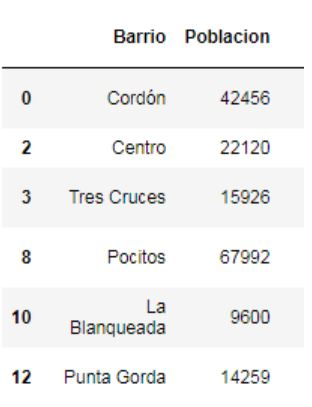



In [91]:
montevideo_pocitos = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Pocitos']
montevideo_pocitos

,Barrio,Barrio Latitud,Barrio Longitud,Local,Local Latitud,Local Longitud,Local Dirección(esquina),Local Categoria
472,Pocitos,-34.911123,-56.150593,Motociclo Sports,-34.909032,-56.146623,Miguel Barreiro 3243 (Berro),Sporting Goods Shop
442,Pocitos,-34.911123,-56.150593,Club Trouville,-34.912473,-56.149755,Chucarro 1031,Basketball Stadium
425,Pocitos,-34.911123,-56.150593,Playa de los Pocitos,-34.912655,-56.145973,Rambla República del Perú (Avenida de Brasil),Beach
436,Pocitos,-34.911123,-56.150593,Rambla y Avenida Brasil,-34.914673,-56.148711,Montevideo Montevideo,Beach
417,Pocitos,-34.911123,-56.150593,Miyagi Shushi,-34.908886,-56.148351,Gabriel Pereira 3138 (26 de marzo),Japanese Restaurant
418,Pocitos,-34.911123,-56.150593,Fellini Ristobaretto,-34.913196,-56.148436,José Martí 3408 (Benito Blanco),Italian Restaurant
420,Pocitos,-34.911123,-56.150593,Gago,-34.912575,-56.148849,Jose Marti 3383 (Juan Benito Blanco),Falafel Restaurant
422,Pocitos,-34.911123,-56.150593,Tandory,-34.907692,-56.152395,Ramon Masini 1130 (Libertad),Restaurant
424,Pocitos,-34.911123,-56.150593,La Cavia,-34.912359,-56.152623,26 de Marzo (Cavia),Latin American Restaurant
439,Pocitos,-34.911123,-56.150593,Lokotas,-34.908826,-56.148432,Montevideo Montevideo,Empanada Restaurant


In [92]:
#Definimos las coordenadas de Montevideo
latitude3 =montevideo_pocitos.iloc[[0],[1]].astype(float)
longitude3 = montevideo_pocitos.iloc[[0],[2]].astype(float)
print('Latitud Pocitos-Montevideo:',latitude3)
print('Longitud Pocitos-Montevideo:',longitude3)

Latitud Pocitos-Montevideo:      Barrio Latitud
472      -34.911123
Longitud Pocitos-Montevideo:      Barrio Longitud
472       -56.150593


In [93]:
montevideo_pocitos_map = folium.Map(location=[-34.911123, -56.150593], zoom_start=16, tiles = 'Stamen Toner')
# establecer el esquema de color para las agrupaciones

# añadir marcadores al mapa
for lat, lon, loc, cat, addr in zip(montevideo_pocitos['Local Latitud'], montevideo_pocitos['Local Longitud'],
                                  montevideo_pocitos['Local'], montevideo_pocitos['Local Categoria'],
                             montevideo_pocitos['Local Dirección(esquina)']):
    label = folium.Popup(str(addr) + ' - ' + str(cat), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(montevideo_pocitos_map)
    folium.map.Marker(
        [lat,lon],
        icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 5; color: blue;"><b>%s</b></div>' % '{}'.format(loc))).add_to(montevideo_pocitos_map)
       
montevideo_pocitos_map